In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


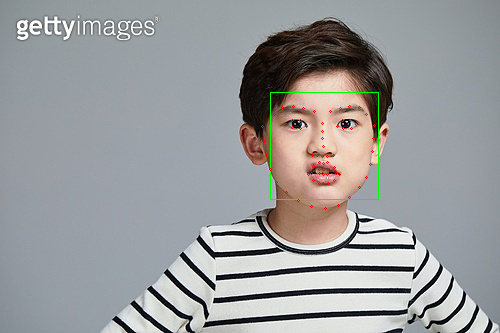

1/1 [==============================] - 0s 87ms/step
기쁨: 0.0%
당황: 0.0%
분노: 100.0%
슬픔: 0.0%
중립: 0.0%


In [28]:
import dlib
import cv2
import numpy as np
from tensorflow import keras
from google.colab.patches import cv2_imshow

image_path = 'drive/MyDrive/1.jpg'
image = cv2.imread(image_path)

# Face Detection
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('drive/MyDrive/shape_predictor_68_face_landmarks.dat')

face = detector(image, 1)[0]
face_image = image.copy()[face.top():face.bottom(), face.left():face.right()]
cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 1)

shape = predictor(image, face)
for i in range(shape.num_parts):
    point = shape.part(i)
    cv2.circle(image, (point.x, point.y), 1, (0, 0, 255), 1)

cv2_imshow(image)

# Facial Expression Detection
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = cv2.resize(face_image, (128, 128))

model = keras.models.load_model('drive/MyDrive/best-cnn-model.h5')
result = model.predict(face_image.reshape(1, 128, 128, 1)[0:1])[0]
result = list(result)

emotion_list = ['기쁨', '당황', '분노', '슬픔', '중립']
for emotion in emotion_list:
  print('{}: {}%'.format(emotion, result[emotion_list.index(emotion)] * 100))